<a href="https://colab.research.google.com/github/monicasjsu/Emerging-Software-Technologies/blob/master/Assignment_2/Assignment_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gradient Tape and low level Tensorflow to build a Linear Classifier


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

Trying to compute gradients using Gradient Tape

**Gradient Tape:**

`tf.GradientTape` allows us to track TensorFlow computations and calculate gradients with respect to some given input variables.
We calculate gradients of a calculation w.r.t. a variable with 
`tape.gradient()`. If we want to use multiple variables in our calculations, all we need to do is give `tape.gradient` a list or tuple of those variables.

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

print(tape.gradient(y, x).numpy())

27.0


`GradientTape.gradient` can only be called once on non-persistent tapes. 
we need to set `persistent=True` for calling `tape.gradient` for the second time.

In [ ]:
a = tf.Variable(6.0, trainable=True)
b = tf.Variable(2.0, trainable=True)
with tf.GradientTape(persistent=True) as tape:
    y1 = a ** 2
    y2 = b ** 3
                                                                                                                                                                                                                                                                                                                                                
print(tape.gradient(y1, a).numpy())
print(tape.gradient(y2, b).numpy())

12.0
12.0


# **Building a Linear Classifier using GradientTape**

Building a Linear Classifier

In [ ]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Preparing artificail dataset to run the model

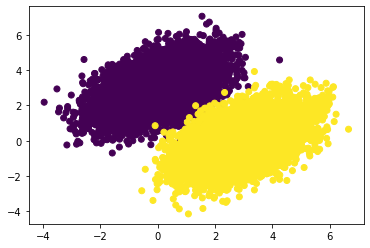

In [ ]:
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [ ]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

In [ ]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0756
Epoch 1: last batch loss = 0.0782
Epoch 2: last batch loss = 0.0424
Epoch 3: last batch loss = 0.0394
Epoch 4: last batch loss = 0.0363
Epoch 5: last batch loss = 0.0260
Epoch 6: last batch loss = 0.0308
Epoch 7: last batch loss = 0.0268
Epoch 8: last batch loss = 0.0352
Epoch 9: last batch loss = 0.0170


Checking the predictions given by our model

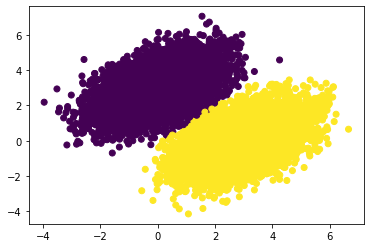

In [ ]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)